In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

In [7]:
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [8]:
df.shape

(49068, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [10]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [11]:
df.rename(columns = {'Province/State' : 'State' , 'Country/Region' : 'Country'} , inplace = True)

In [12]:
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [13]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [14]:
top = df[df['Date'] == '2020-07-27']
top.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [15]:
top.groupby(by = 'Country')[['Confirmed' , 'Deaths' , 'Recovered' , 'Active']].sum().reset_index()     #why we have calculated sum here??

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [16]:
confirm = df.groupby(by = 'Date')[['Confirmed']].sum().reset_index()
confirm.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [17]:
confirm.tail()

,Date,Confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [18]:
confirm = df.groupby(by = 'Date')[['Active','Deaths','Recovered','Confirmed']].sum().reset_index()
confirm.head()

,Date,Active,Deaths,Recovered,Confirmed
0,2020-01-22,510,17,28,555
1,2020-01-23,606,18,30,654
2,2020-01-24,879,26,36,941
3,2020-01-25,1353,42,39,1434
4,2020-01-26,2010,56,52,2118


In [19]:
confirm

,Date,Active,Deaths,Recovered,Confirmed
0,2020-01-22,510,17,28,555
1,2020-01-23,606,18,30,654
2,2020-01-24,879,26,36,941
3,2020-01-25,1353,42,39,1434
4,2020-01-26,2010,56,52,2118
...,...,...,...,...,...
183,2020-07-23,6166006,633506,8710969,15510481
184,2020-07-24,6212290,639650,8939705,15791645
185,2020-07-25,6243930,644517,9158743,16047190
186,2020-07-26,6309711,648621,9293464,16251796


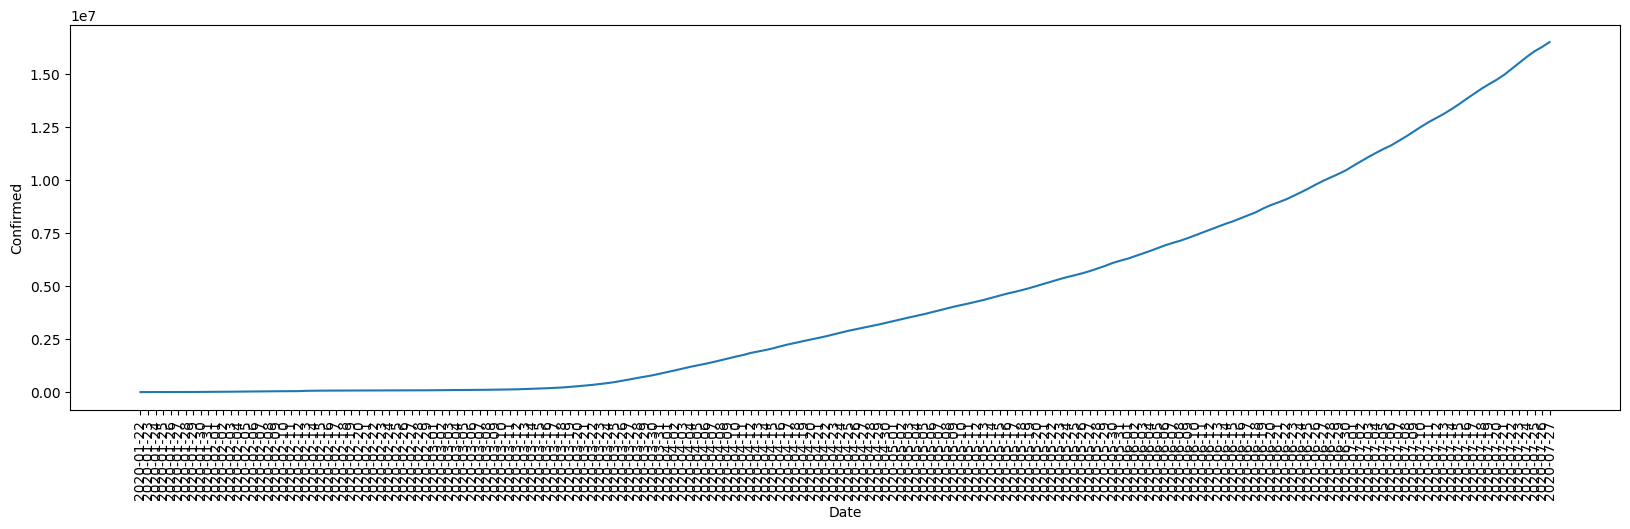

In [20]:
plt.figure(figsize=(20,5))
sns.lineplot(data = confirm , x = 'Date' , y = 'Confirmed')
plt.xticks(rotation = 90)
plt.show()

In [21]:
top_10= df.groupby(by = 'Country')[['Active'	, 'Deaths'	, 'Recovered'	, 'Confirmed']].sum().head(10).sort_values(by='Country',ascending = False)

In [22]:
top_10

,Active,Deaths,Recovered,Confirmed
Country,,,,
Austria,325216,71390,1638380,2034986
Australia,236932,11387,711928,960247
Armenia,702602,27089,857482,1587173
Argentina,2672885,97749,1680024,4450658
Antigua and Barbuda,1561,326,2600,4487
Angola,15011,1078,6573,22662
Andorra,19907,5423,69074,94404
Algeria,345886,77972,755897,1179755
Albania,72117,5708,118877,196702


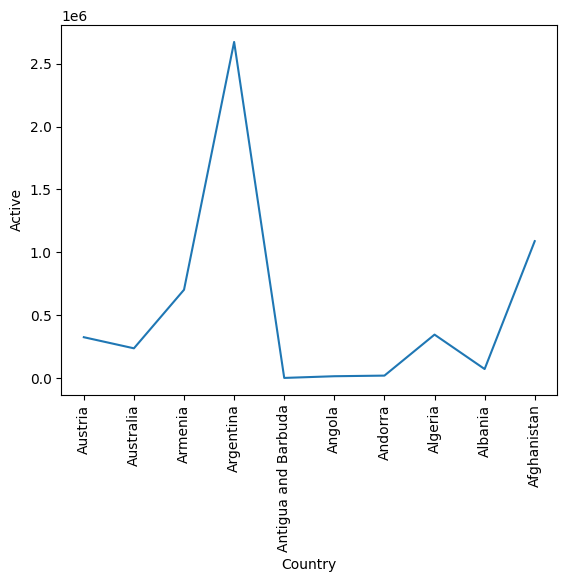

In [23]:
sns.lineplot(data = top_10 , x = 'Country' , y = 'Active')
plt.xticks(rotation = 90)
plt.show()

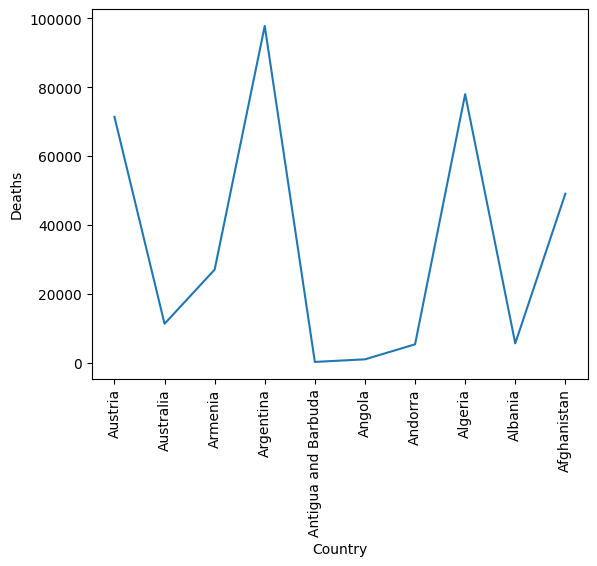

In [24]:
sns.lineplot(data = top_10 , x = 'Country' , y = 'Deaths')
plt.xticks(rotation = 90)
plt.show()

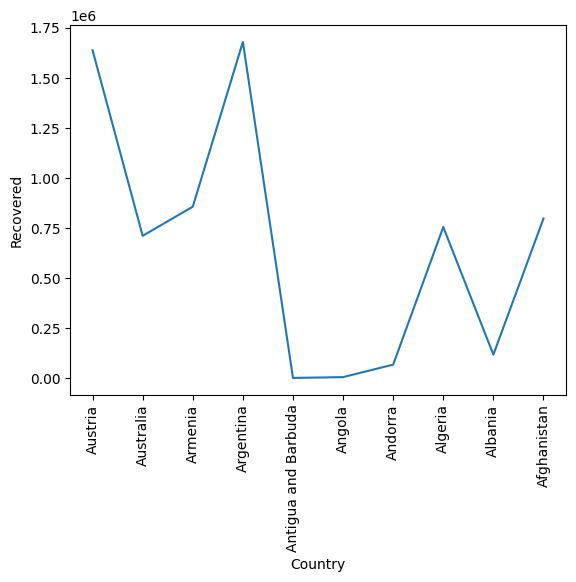

In [25]:
sns.lineplot(data = top_10 , x = 'Country' , y = 'Recovered')
plt.xticks(rotation = 90)
plt.show()

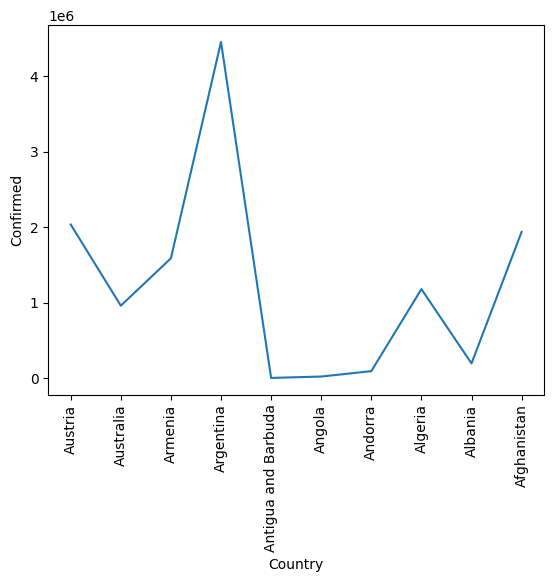

In [26]:
sns.lineplot(data = top_10 , x = 'Country' , y = 'Confirmed')
plt.xticks(rotation = 90)
plt.show()

In [27]:
df['Country'].value_counts()

,count
Country,
China,6204
Canada,2256
France,2068
United Kingdom,2068
Australia,1504
...,...
Sao Tome and Principe,188
Yemen,188
Comoros,188


In [28]:
US = df[df['Country'] == 'US']
US.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [29]:
US = df[df['Country'] == 'US']
US.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [30]:
INDIA = df[df['Country'] == 'India']
INDIA.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


In [31]:
CHINA = df[df['Country'] == 'China']
CHINA.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific


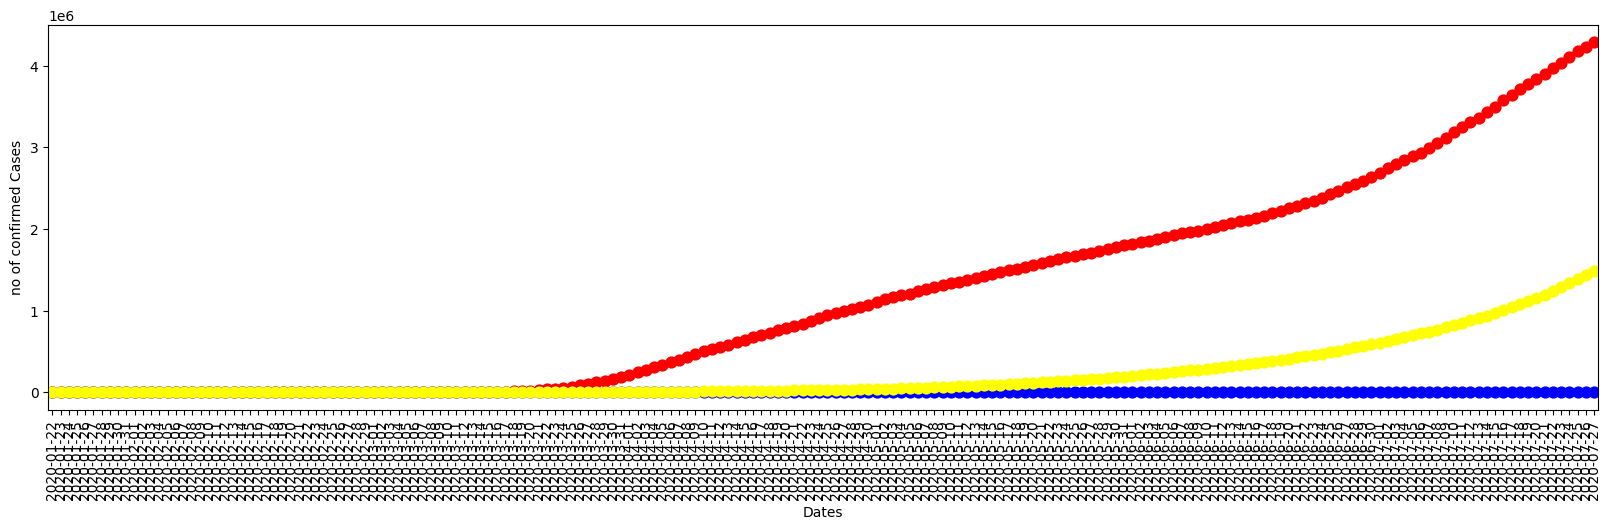

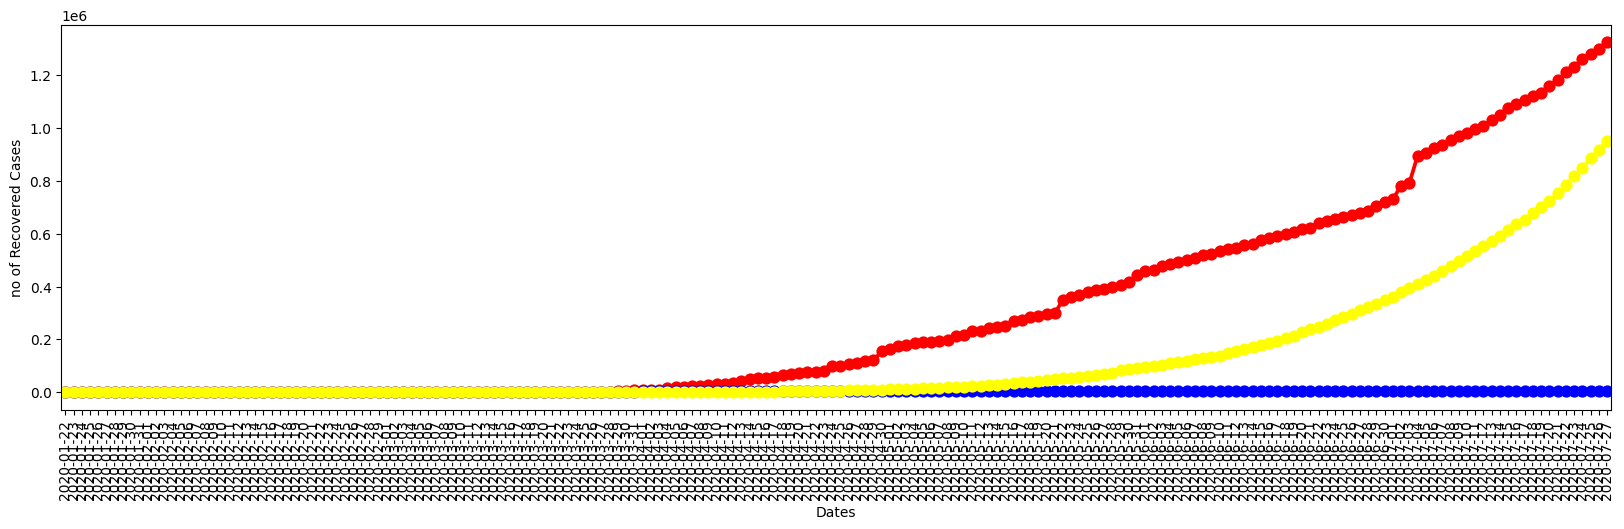

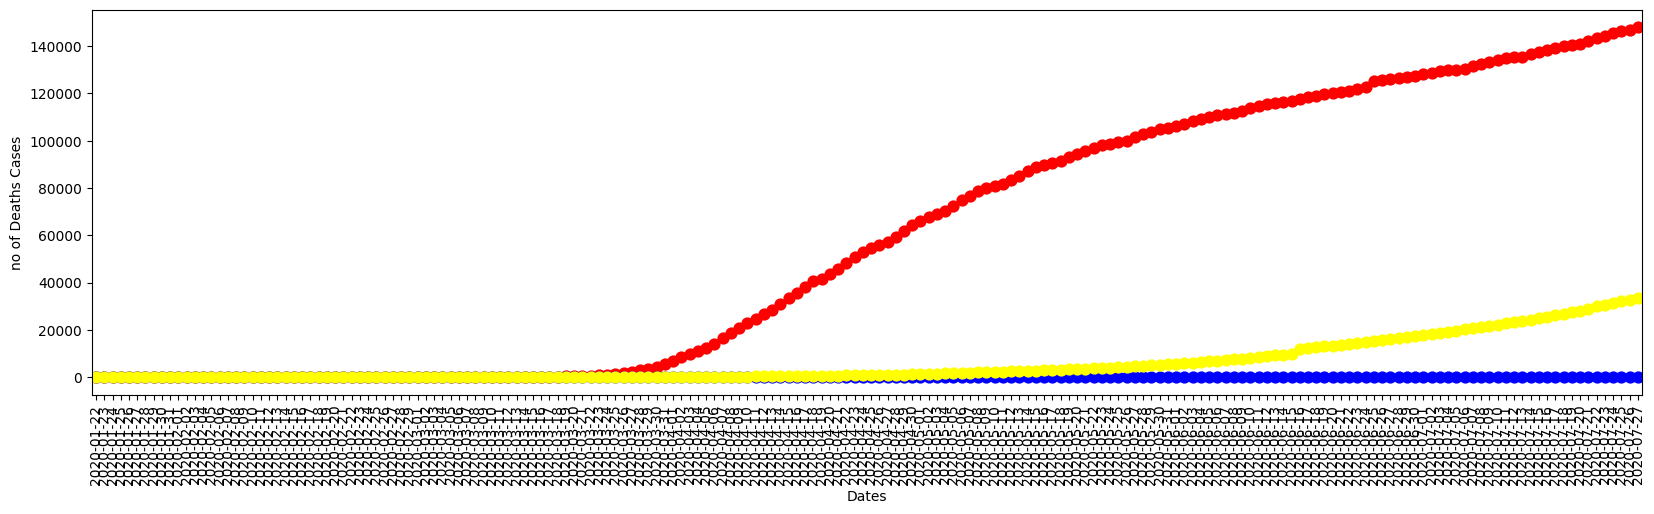

In [59]:
plt.figure(figsize=(20,5))
sns.pointplot(data=US,x='Date',y='Confirmed',color='Red')
sns.pointplot(data=CHINA,x='Date',y='Confirmed',color='Blue')
sns.pointplot(data=INDIA,x='Date',y='Confirmed',color='Yellow')
plt.xticks(rotation = 90)
plt.ylabel('no of confirmed Cases')
plt.xlabel('Dates')
plt.show()




plt.figure(figsize=(20,5))
sns.pointplot(data=US,x='Date',y='Recovered',color='Red')
sns.pointplot(data=CHINA,x='Date',y='Recovered',color='Blue')
sns.pointplot(data=INDIA,x='Date',y='Recovered',color='Yellow')
plt.xticks(rotation = 90)
plt.ylabel('no of Recovered Cases')
plt.xlabel('Dates')
plt.show()



plt.figure(figsize=(20,5))
sns.pointplot(data=US,x='Date',y='Deaths',color='Red')
sns.pointplot(data=CHINA,x='Date',y='Deaths',color='Blue')
sns.pointplot(data=INDIA,x='Date',y='Deaths',color='Yellow')
plt.xticks(rotation = 90)
plt.ylabel('no of Deaths Cases')
plt.xlabel('Dates')
plt.show()

In [33]:
!pip install prophet

In [34]:
df_1 = pd.read_csv('/content/covid_19_clean_complete.csv')
df_1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [35]:
confirmed_cases = df_1.groupby(by = 'Date').sum()['Confirmed'].reset_index()
confirmed_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [36]:
confirmed_cases.columns = ['ds' , 'y']
confirmed_cases.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [67]:
Recovered_cases = df_1.groupby(by = 'Date')['Recovered'].sum().reset_index()
Recovered_cases

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [69]:
Recovered_cases.columns = ['ds' , 'y']
Recovered_cases.head(10)

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
5,2020-01-27,61
6,2020-01-28,107
7,2020-01-29,125
8,2020-01-30,141
9,2020-01-31,219


In [71]:
Death_cases = df_1.groupby(by = 'Date')['Deaths'].sum().reset_index()
Death_cases

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [73]:
Death_cases.columns = ['ds' , 'y']
Death_cases.head(10)

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
5,2020-01-27,82
6,2020-01-28,131
7,2020-01-29,133
8,2020-01-30,171
9,2020-01-31,213


In [74]:
Active_case = df_1.groupby(by = 'Date')['Active'].sum().reset_index()
Active_case

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [75]:
Active_case.columns = ['ds' , 'y']
Active_case.head(10)

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
5,2020-01-27,2784
6,2020-01-28,5340
7,2020-01-29,5908
8,2020-01-30,7922
9,2020-01-31,9495


In [37]:
from prophet import Prophet

In [38]:
m = Prophet()

In [39]:
m.fit(confirmed_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhffso28/4c4juqgr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhffso28/umoymjbo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75532', 'data', 'file=/tmp/tmpmhffso28/4c4juqgr.json', 'init=/tmp/tmpmhffso28/umoymjbo.json', 'output', 'file=/tmp/tmpmhffso28/prophet_models1qt7xd9/prophet_model-20250708094220.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:42:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:42:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [89]:
# key word for forecasting make_future_dataframe
future_confirmed = m.make_future_dataframe(periods = 7)
forecast_1 = m.predict(future_confirmed)
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113015,-2665.544401,1252.411266,-522.113015,-522.113015,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,0.0,0.0,0.0,-713.300051
1,2020-01-23,-432.419147,-1994.483578,1850.751388,-432.419147,-432.419147,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,-43.747057
2,2020-01-24,-342.725280,-1514.253485,2424.453497,-342.725280,-342.725280,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,531.538048
3,2020-01-25,-253.031412,-1467.619103,2422.245517,-253.031412,-253.031412,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,473.857138
4,2020-01-26,-163.337545,-2319.883345,1544.596488,-163.337545,-163.337545,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,-328.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,663102.723561,661440.101303,665574.658011,662809.100022,663393.240652,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,663491.395651
191,2020-07-31,668132.130984,666557.390910,671177.917562,667538.528526,668704.546828,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,669006.394312
192,2020-08-01,673161.538407,671539.222234,676271.585134,672067.321665,674182.069046,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,673888.426957
193,2020-08-02,678190.945830,675374.482164,680539.649600,676500.946008,679649.174373,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,678025.345020


In [77]:
m = Prophet()

In [78]:
m.fit(Recovered_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhffso28/6_6vyy1p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhffso28/1sw6cxln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52773', 'data', 'file=/tmp/tmpmhffso28/6_6vyy1p.json', 'init=/tmp/tmpmhffso28/1sw6cxln.json', 'output', 'file=/tmp/tmpmhffso28/prophet_modelz_sf69_d/prophet_model-20250708105648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:56:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:56:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [90]:
# key word for forecasting make_future_dataframe
future_recovered = m.make_future_dataframe(periods = 7)
forecast_2 = m.predict(future_recovered)
forecast_2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113015,-2743.082475,1293.375202,-522.113015,-522.113015,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,0.0,0.0,0.0,-713.300051
1,2020-01-23,-432.419147,-2007.901777,1999.818903,-432.419147,-432.419147,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,-43.747057
2,2020-01-24,-342.725280,-1573.419982,2443.015702,-342.725280,-342.725280,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,531.538048
3,2020-01-25,-253.031412,-1482.691522,2404.506587,-253.031412,-253.031412,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,473.857138
4,2020-01-26,-163.337545,-2374.034516,1657.029013,-163.337545,-163.337545,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,-328.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,663102.723561,661384.737583,665467.756030,662875.120301,663360.208674,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,663491.395651
191,2020-07-31,668132.130984,666816.941212,671155.692053,667627.789186,668725.877648,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,669006.394312
192,2020-08-01,673161.538407,671595.007874,676241.723735,672236.751695,674126.015147,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,673888.426957
193,2020-08-02,678190.945830,675617.809015,680865.927916,676888.356579,679639.860786,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,678025.345020


In [81]:
m = Prophet()

In [82]:
m.fit(Death_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhffso28/ps0fco05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhffso28/nut4dqto.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15005', 'data', 'file=/tmp/tmpmhffso28/ps0fco05.json', 'init=/tmp/tmpmhffso28/nut4dqto.json', 'output', 'file=/tmp/tmpmhffso28/prophet_modelf518bln9/prophet_model-20250708105828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:58:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:58:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [91]:
future_deaths = m.make_future_dataframe(periods = 7)
forecast_3 = m.predict(future_deaths)
forecast_3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113015,-2818.765342,1194.810597,-522.113015,-522.113015,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,0.0,0.0,0.0,-713.300051
1,2020-01-23,-432.419147,-2032.930523,1779.501757,-432.419147,-432.419147,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,-43.747057
2,2020-01-24,-342.725280,-1314.677065,2509.930279,-342.725280,-342.725280,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,531.538048
3,2020-01-25,-253.031412,-1435.950284,2472.778734,-253.031412,-253.031412,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,473.857138
4,2020-01-26,-163.337545,-2336.702996,1585.578169,-163.337545,-163.337545,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,-328.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,663102.723561,661383.032193,665697.957954,662755.080741,663426.477008,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,663491.395651
191,2020-07-31,668132.130984,666798.506055,671394.621253,667462.984767,668828.093015,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,669006.394312
192,2020-08-01,673161.538407,671540.239496,676399.785622,672095.567883,674312.111542,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,673888.426957
193,2020-08-02,678190.945830,675325.044081,680843.738484,676702.546715,679849.757955,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,678025.345020


In [79]:
m = Prophet()

In [80]:
m.fit(Active_case)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhffso28/lzb9wdpu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmhffso28/0leprsa1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54826', 'data', 'file=/tmp/tmpmhffso28/lzb9wdpu.json', 'init=/tmp/tmpmhffso28/0leprsa1.json', 'output', 'file=/tmp/tmpmhffso28/prophet_modeldmy0p5fd/prophet_model-20250708105756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:57:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:57:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [92]:
future_Active = m.make_future_dataframe(periods = 7)
forecast_4 = m.predict(future_Active)
forecast_4

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113015,-2622.089212,1303.247917,-522.113015,-522.113015,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,0.0,0.0,0.0,-713.300051
1,2020-01-23,-432.419147,-1939.113548,1950.062482,-432.419147,-432.419147,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,-43.747057
2,2020-01-24,-342.725280,-1528.655198,2519.171344,-342.725280,-342.725280,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,531.538048
3,2020-01-25,-253.031412,-1421.124116,2460.657849,-253.031412,-253.031412,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,473.857138
4,2020-01-26,-163.337545,-2331.342243,1686.283408,-163.337545,-163.337545,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,-328.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,663102.723561,661611.214873,665541.103775,662856.140664,663387.978001,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,663491.395651
191,2020-07-31,668132.130984,666814.176081,671057.639465,667650.360554,668601.614433,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,669006.394312
192,2020-08-01,673161.538407,671679.266763,676010.432065,672306.673156,674107.977641,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,673888.426957
193,2020-08-02,678190.945830,675502.967725,680604.205676,677022.773555,679602.688589,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,678025.345020


In [93]:
forecast_1[['ds' , 'yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-713.300051,1252.411266,-2665.544401
1,2020-01-23,-43.747057,1850.751388,-1994.483578
2,2020-01-24,531.538048,2424.453497,-1514.253485
3,2020-01-25,473.857138,2422.245517,-1467.619103
4,2020-01-26,-328.938355,1544.596488,-2319.883345
...,...,...,...,...
190,2020-07-30,663491.395651,665574.658011,661440.101303
191,2020-07-31,669006.394312,671177.917562,666557.390910
192,2020-08-01,673888.426957,676271.585134,671539.222234
193,2020-08-02,678025.345020,680539.649600,675374.482164


In [96]:
forecast_2[['ds' , 'yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-713.300051,1293.375202,-2743.082475
1,2020-01-23,-43.747057,1999.818903,-2007.901777
2,2020-01-24,531.538048,2443.015702,-1573.419982
3,2020-01-25,473.857138,2404.506587,-1482.691522
4,2020-01-26,-328.938355,1657.029013,-2374.034516
...,...,...,...,...
190,2020-07-30,663491.395651,665467.756030,661384.737583
191,2020-07-31,669006.394312,671155.692053,666816.941212
192,2020-08-01,673888.426957,676241.723735,671595.007874
193,2020-08-02,678025.345020,680865.927916,675617.809015


In [95]:
forecast_3[['ds' , 'yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-713.300051,1194.810597,-2818.765342
1,2020-01-23,-43.747057,1779.501757,-2032.930523
2,2020-01-24,531.538048,2509.930279,-1314.677065
3,2020-01-25,473.857138,2472.778734,-1435.950284
4,2020-01-26,-328.938355,1585.578169,-2336.702996
...,...,...,...,...
190,2020-07-30,663491.395651,665697.957954,661383.032193
191,2020-07-31,669006.394312,671394.621253,666798.506055
192,2020-08-01,673888.426957,676399.785622,671540.239496
193,2020-08-02,678025.345020,680843.738484,675325.044081


In [94]:
forecast_4[['ds' , 'yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-713.300051,1303.247917,-2622.089212
1,2020-01-23,-43.747057,1950.062482,-1939.113548
2,2020-01-24,531.538048,2519.171344,-1528.655198
3,2020-01-25,473.857138,2460.657849,-1421.124116
4,2020-01-26,-328.938355,1686.283408,-2331.342243
...,...,...,...,...
190,2020-07-30,663491.395651,665541.103775,661611.214873
191,2020-07-31,669006.394312,671057.639465,666814.176081
192,2020-08-01,673888.426957,676010.432065,671679.266763
193,2020-08-02,678025.345020,680604.205676,675502.967725


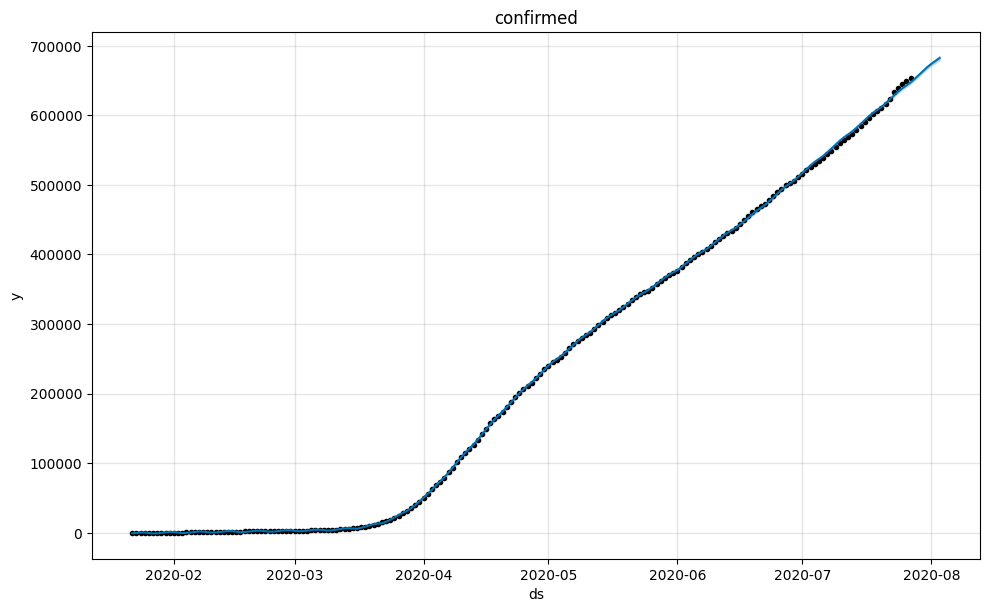

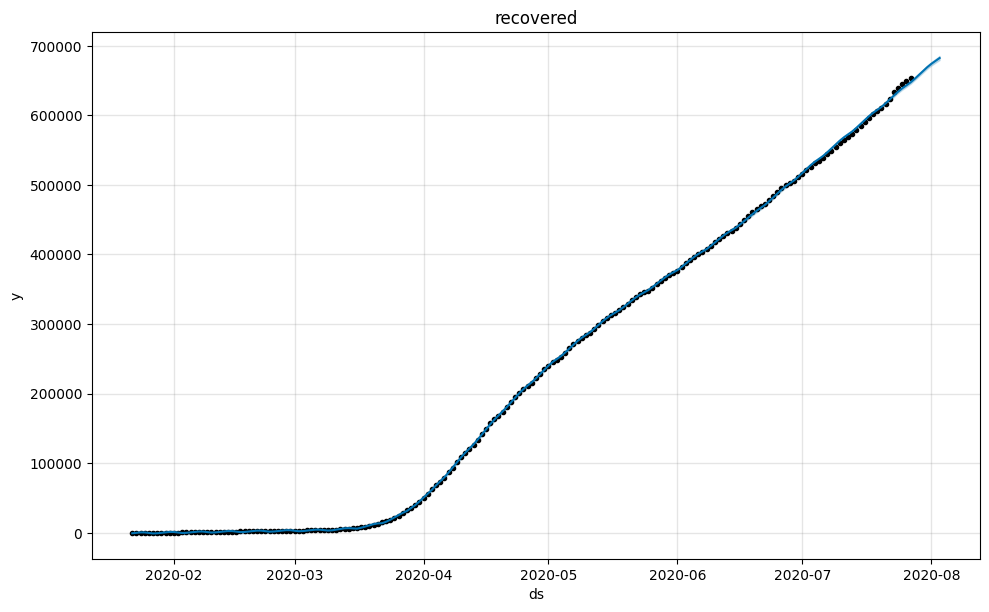

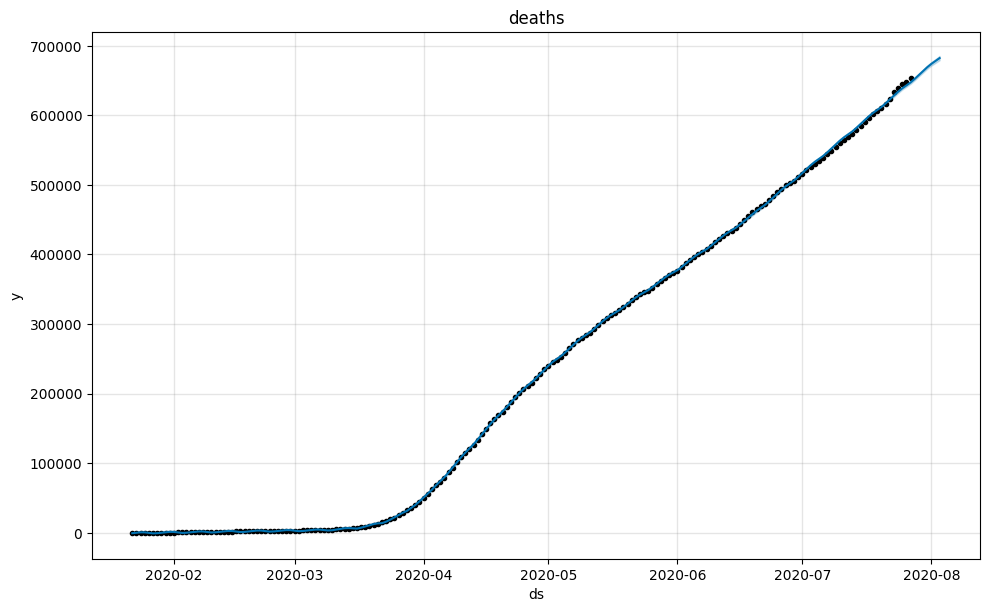

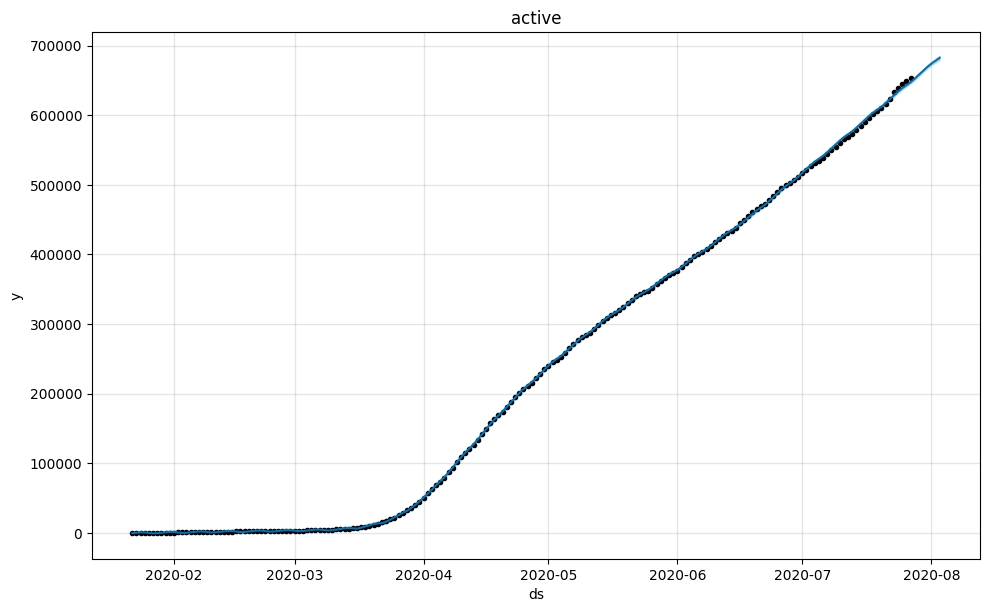

In [113]:
x = [forecast_1 , forecast_2 , forecast_3 , forecast_4]
y = ['confirmed' , 'recovered' , 'deaths' , 'active']
for (i,k) in zip(x,y):
  m.plot(i)
  plt.title(k)
  plt.show()

In [43]:
import plotly
import plotly.express as px

In [44]:
df_1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [45]:
world = df_1.groupby(by = 'Country/Region')[['Confirmed',
       'Deaths', 'Recovered', 'Active']].sum().reset_index()

world

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [46]:
fig = px.choropleth(world , locations='Country/Region',
                    locationmode= 'country names',
                    color= 'Deaths',hover_name = 'Country/Region',
                    range_color=(1,20000),
                    color_continuous_scale='reds',
                    title='Countries with Deaths cases')
fig.show()